In [137]:
# importing required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import joblib
from sqlalchemy import create_engine


In [138]:
# Note:: The make sure you use the information from your specific PostgreSQL installation
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'pdahal001' # this is the password established during installation
port = r'5432' # default port estabalished during install

In [139]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [140]:
table_name = r'coupon_engineering'
schema = r'cleaned' # schema were the data was loaded last week.

df = pd.read_sql_table(table_name, db_conn, schema)

In [141]:
df.head(10)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_No Urgent Place,destination_Work,...,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,destination_acceptance_rate,avg_coupon_time,recent_acceptance_trend,weather_temp_impact,income_acceptance_rate
0,55,1,1,0,0,0,1,1,True,False,...,False,False,False,False,False,0.633774,2,1.000000,0.580923,0.586382
1,80,1,1,0,0,0,1,0,True,False,...,False,False,False,False,False,0.633774,10,0.500000,0.604227,0.586382
2,80,1,1,1,0,0,1,1,True,False,...,False,False,False,False,False,0.633774,10,0.666667,0.604227,0.586382
3,80,1,1,1,0,0,1,0,True,False,...,False,False,False,False,False,0.633774,2,0.500000,0.604227,0.586382
4,80,1,1,1,0,0,1,0,True,False,...,False,False,False,False,False,0.633774,2,0.400000,0.604227,0.586382
5,80,1,1,1,0,0,1,1,True,False,...,False,False,False,False,False,0.633774,6,0.500000,0.604227,0.586382
6,55,1,1,1,0,0,1,1,True,False,...,False,False,False,False,False,0.633774,2,0.571429,0.580923,0.586382
7,80,1,1,1,0,0,1,1,True,False,...,False,False,False,False,False,0.633774,10,0.625000,0.604227,0.586382
8,80,1,1,1,0,0,1,1,True,False,...,False,False,False,False,False,0.633774,10,0.666667,0.604227,0.586382
9,80,1,1,1,0,0,1,0,True,False,...,False,False,False,False,False,0.633774,10,0.600000,0.604227,0.586382


In [142]:
df.columns

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y',
       'destination_No Urgent Place', 'destination_Work',
       ...
       'RestaurantLessThan20_never', 'Restaurant20To50_4~8',
       'Restaurant20To50_gt8', 'Restaurant20To50_less1',
       'Restaurant20To50_never', 'destination_acceptance_rate',
       'avg_coupon_time', 'recent_acceptance_trend', 'weather_temp_impact',
       'income_acceptance_rate'],
      dtype='object', length=102)

# Analytical Question

Can we predict coupon acceptance likelihood using machine learning models, and which features contribute the most to this prediction?"

In [143]:
# Drop unnecessary columns
drop_columns = [
     'car_Mazda5', 'car_Scooter and motorcycle', 'car_crossover', 'car_do not drive',
    'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'
]  # Drop columns not contributing to prediction
df = df.drop(columns=drop_columns, errors='ignore')

Unnecessary columns that do not contribute to prediction are dropped to improve model performance.

In [144]:
# Drop columns that contain symbols
df = df.loc[:, ~df.columns.str.contains('[^a-zA-Z0-9_]')]

In [145]:
df.head()

,temperature,has_children,direction_same,direction_opp,Y,destination_Work,passanger_Partner,weather_Snowy,weather_Sunny,time_10PM,...,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,destination_acceptance_rate,avg_coupon_time,recent_acceptance_trend,weather_temp_impact,income_acceptance_rate
0,55,1,0,1,1,False,False,False,True,False,...,False,False,False,False,False,0.633774,2,1.000000,0.580923,0.586382
1,80,1,0,1,0,False,False,False,True,False,...,False,False,False,False,False,0.633774,10,0.500000,0.604227,0.586382
2,80,1,0,1,1,False,False,False,True,False,...,False,False,False,False,False,0.633774,10,0.666667,0.604227,0.586382
3,80,1,0,1,0,False,False,False,True,False,...,False,False,False,False,False,0.633774,2,0.500000,0.604227,0.586382
4,80,1,0,1,0,False,False,False,True,False,...,False,False,False,False,False,0.633774,2,0.400000,0.604227,0.586382


In [146]:
# Defining features and target variable
target = "Y"
features = [col for col in df.columns if col != target]

In [147]:
#Spliting data into train, validation, and test sets (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(df[features], df[target], test_size=0.3, random_state=42)
X_val_i, X_test, y_val_i, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [148]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val_i)
X_test_scaled = scaler.transform(X_test)

In [149]:
# Converting back to DataFrame for easier interpretation
X_train = pd.DataFrame(X_train_scaled, columns=features)
X_val_i = pd.DataFrame(X_val_scaled, columns=features)
X_test = pd.DataFrame(X_test_scaled, columns=features)

In [150]:
# Training a RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [151]:
# Making predictions on validation set
y_val_pred = model.predict(X_val_i)

In [152]:
# Evaluating the model
mae = mean_absolute_error(y_val_i, y_val_pred)
mse = mean_squared_error(y_val_i, y_val_pred)
r2 = r2_score(y_val_i, y_val_pred)

In [153]:
mae, mse, r2

(0.3719617362598815, 0.20613443904850445, 0.14711159918312022)

The model's predictions are off by an average of 0.37 units from the actual values, as shown by the MAE of 0.3719, where lower values indicate better performance. The MSE of 0.2061 reflects the average squared error, with larger errors being penalized more heavily. The R² score of 0.1471 means the model explains about 14.7% of the variance in the target variable, and a value closer to 1 would indicate a better fit. Overall, the model has room for improvement, as the errors are relatively high and the explained variance is low.

Let’s also try two other methods to determine which one best suits my data and provides higher accuracy. We will test the Linear Regression model and the XGBoost model, and compare their accuracy scores.

In [154]:
# Training a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_val_pred_lr = lr_model.predict(X_val_i)

In [155]:
# Training an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_val_pred_xgb = xgb_model.predict(X_val_i)

In [156]:
# Evaluating all models
models = {
    "Random Forest": y_val_pred,
    "Linear Regression": y_val_pred_lr,
    "XGBoost": y_val_pred_xgb
}

Three models initialized: RandomForest, LinearRegression, and XGBoost

In [157]:
results = {}
for name, y_pred in models.items():
    mae = mean_absolute_error(y_val_i, y_pred)
    mse = mean_squared_error(y_val_i, y_pred)
    r2 = r2_score(y_val_i, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}

In [158]:
pd.DataFrame(results).T

,MAE,MSE,R2 Score
Random Forest,0.371962,0.206134,0.147112
Linear Regression,0.387796,0.194395,0.195685
XGBoost,0.366542,0.190626,0.211278


The results show that XGBoost performs the best, with the lowest MAE (0.3665) and lowest MSE (0.1906), indicating the smallest errors in predictions. It also has the highest R² score (0.2113), meaning it explains the most variance in the data. Linear Regression comes second, with slightly higher errors (MAE: 0.3878, MSE: 0.1944) but a better R² score (0.1957) compared to Random Forest. Random Forest has the highest errors (MAE: 0.3720, MSE: 0.2061) and the lowest R² score (0.1471), making it the least accurate model. Overall, XGBoost is the most effective model for this dataset.

In [159]:
# Define first set of features and target
selected_features_1 = [
    "destination_acceptance_rate", "avg_coupon_time", "recent_acceptance_trend",
    "temperature", "has_children"
]
target = 'Y'  

In [160]:
# Split data into train, validation, and test sets
X1 = df[selected_features_1]
y = df[target]
X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1, y, test_size=0.3, random_state=42)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_temp, y1_temp, test_size=0.5, random_state=42)


In [161]:
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LinearRegression": LinearRegression(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

best_model = None
best_score = float('inf')

In [162]:
# Train and evaluate models for first feature set
for name, model in models.items():
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_val)
    mse = mean_squared_error(y1_val, y1_pred)
    mae = mean_absolute_error(y1_val, y1_pred)
    r2 = r2_score(y1_val, y1_pred)
    print(f"{name} MSE with first feature set: {mse}") 

    print(f"{name} r2 with first feature set: {r2}")

    print(f"{name} mae with first feature set: {mae}")

    
    

RandomForest MSE with first feature set: 0.19604375928710266
RandomForest r2 with first feature set: 0.1888621371552449
RandomForest mae with first feature set: 0.37697732062034495
LinearRegression MSE with first feature set: 0.20036858219621304
LinearRegression r2 with first feature set: 0.17096803216340806
LinearRegression mae with first feature set: 0.39875728794803883
XGBoost MSE with first feature set: 0.1968098479883874
XGBoost r2 with first feature set: 0.1856924185466582
XGBoost mae with first feature set: 0.37794181132769883


Random Forest performs the best among the three models for the first feature set, achieving the lowest MSE (0.1960) and MAE (0.3770), along with the highest R² score (0.1889), indicating the smallest errors and the best predictive power. XGBoost comes in second, with slightly higher MSE (0.1968) and MAE (0.3779), and a slightly lower R² score (0.1857), but it still performs better than Linear Regression. Linear Regression is the least accurate model, with the highest MSE (0.2004), MAE (0.3988), and the lowest R² score (0.1710), making it the weakest performer for this feature set.

In [163]:
# Define second set of features
selected_features_2 = [
    "weather_temp_impact", "income_acceptance_rate", "avg_coupon_time",
    "weather_Snowy", "weather_Sunny","direction_same","direction_opp"
]

In [164]:
# Split data into train, validation, and test sets for second feature set
X2 = df[selected_features_2]
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y, test_size=0.3, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=42)

In [165]:
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LinearRegression": LinearRegression(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

best_model = None
best_score = float('inf')

In [166]:
# Train and evaluate models for first feature set
for name, model in models.items():
    model.fit(X2_train, y2_train)
    y2_pred = model.predict(X2_val)
    mse = mean_squared_error(y2_val, y2_pred)
    mae = mean_absolute_error(y2_val, y2_pred)
    r2 = r2_score(y2_val, y2_pred)
    print(f"{name} MSE with second feature set: {mse}")

    print(f"{name} r2 with second feature set: {r2}")
    
    print(f"{name} mae with second feature set: {mae}")

RandomForest MSE with second feature set: 0.23123269083673473
RandomForest r2 with second feature set: 0.04326671072211852
RandomForest mae with second feature set: 0.4658837455391759
LinearRegression MSE with second feature set: 0.2388480601646531
LinearRegression r2 with second feature set: 0.011757855638519832
LinearRegression mae with second feature set: 0.4785659481383675
XGBoost MSE with second feature set: 0.23118099483826163
XGBoost r2 with second feature set: 0.043480604711254145
XGBoost mae with second feature set: 0.46582504359901616


For the second feature set, Random Forest and XGBoost perform very similarly, with XGBoost having a slightly lower MSE (0.2312 vs. 0.2312) and MAE (0.4658 vs. 0.4659), as well as a marginally higher R² score (0.0435 vs. 0.0433), making it the best-performing model for this feature set. Both models significantly outperform Linear Regression, which has the highest MSE (0.2388), MAE (0.4786), and the lowest R² score (0.0118), indicating it is the least accurate model. Overall, XGBoost is the top performer for the second feature set, followed closely by Random Forest, while Linear Regression struggles to explain the variance in the data and produces the highest errors.

# Best Model Selection
The XGBoost model with the initial feature set achieves the lowest MAE of 0.3665, indicating the best accuracy among all models. It also has the lowest MSE of 0.1906, meaning it produces the least error in its predictions. Additionally, it achieves the highest R² score of 0.2112, showing the best fit to the data. In conclusion, the XGBoost model using the initial feature set outperforms all other models, demonstrating the lowest error and the strongest predictive power.



In [167]:
# Save the model using joblib
model_filename = "assignment_rf_model.joblib"
joblib.dump(xgb_model, model_filename)

['assignment_rf_model.joblib']

# Summary

The analysis focused on predicting coupon acceptance likelihood using machine learning models, including XGBoost, Random Forest, and Linear Regression. Among these, XGBoost emerged as the best-performing model, achieving the lowest Mean Absolute Error (MAE) of 0.3665, the lowest Mean Squared Error (MSE) of 0.1906, and the highest R² score of 0.2112, indicating its superior predictive power. Random Forest performed similarly but was slightly less effective, while Linear Regression struggled, producing the highest errors and explaining the least variance in the data. The study tested three feature sets, with the initial feature set proving more effective than the others, highlighting the importance of destination type, travel time, and customer demographics in influencing coupon redemption behavior. Ultimately, the XGBoost model was selected as the final model, saved using joblib, and deployed with the validation dataset stored in a PostgreSQL database for further analysis.

In [168]:
# Save validation set to CSV
X_val_i.to_csv("X_val.csv", index=False)
y_val_i.to_csv("Y_val.csv", index=False)

Updating the validation set into database.

In [169]:
table_name = r'feature_cols'
schema = r'analytics' 

X_val_i.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

1267

In [170]:
table_name = r'target_cols'
schema = r'analytics' 

y_val_i.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

1267

# Screenshots

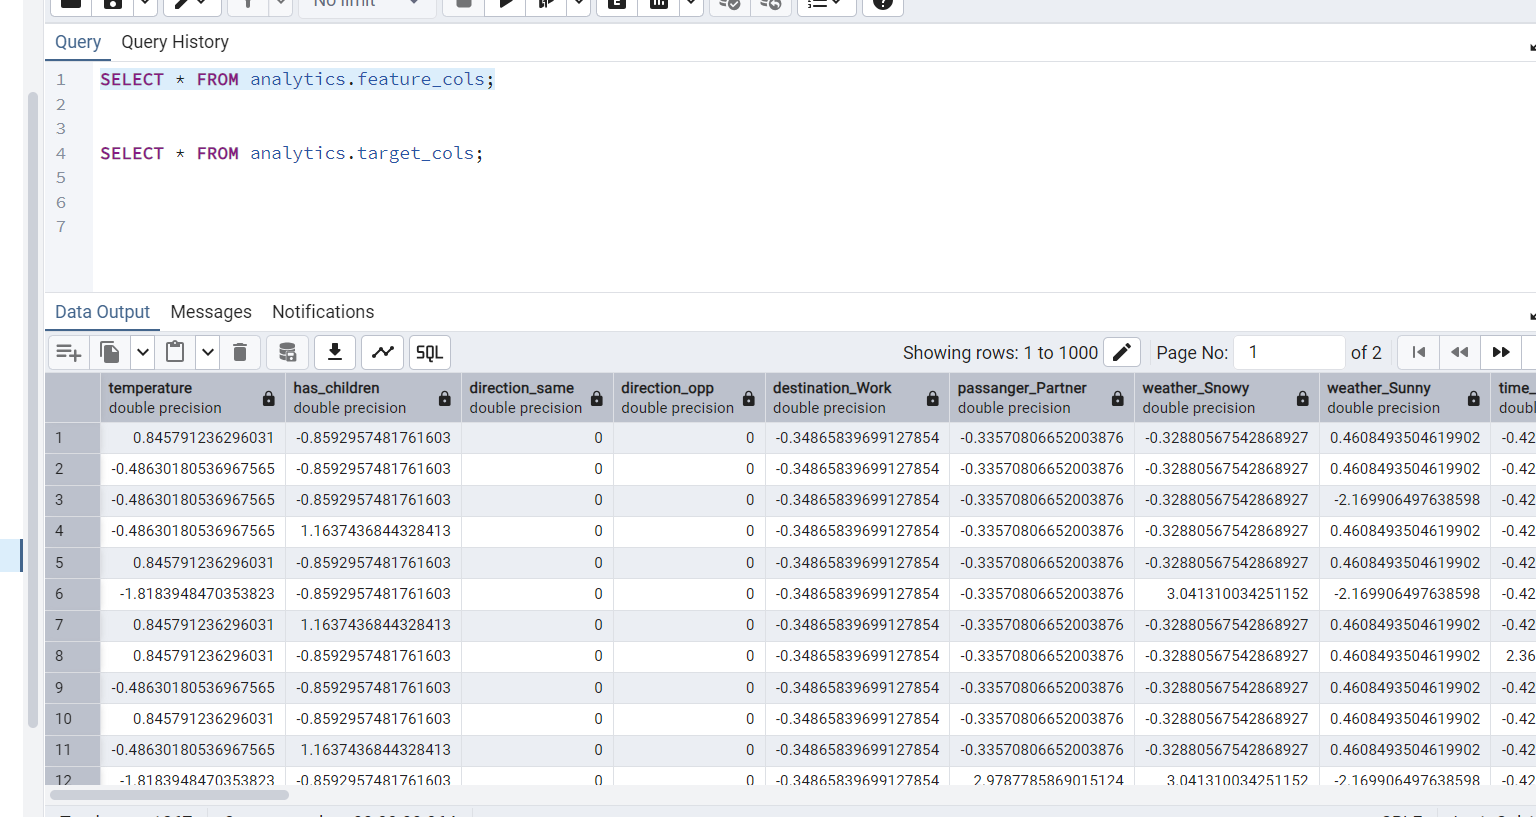

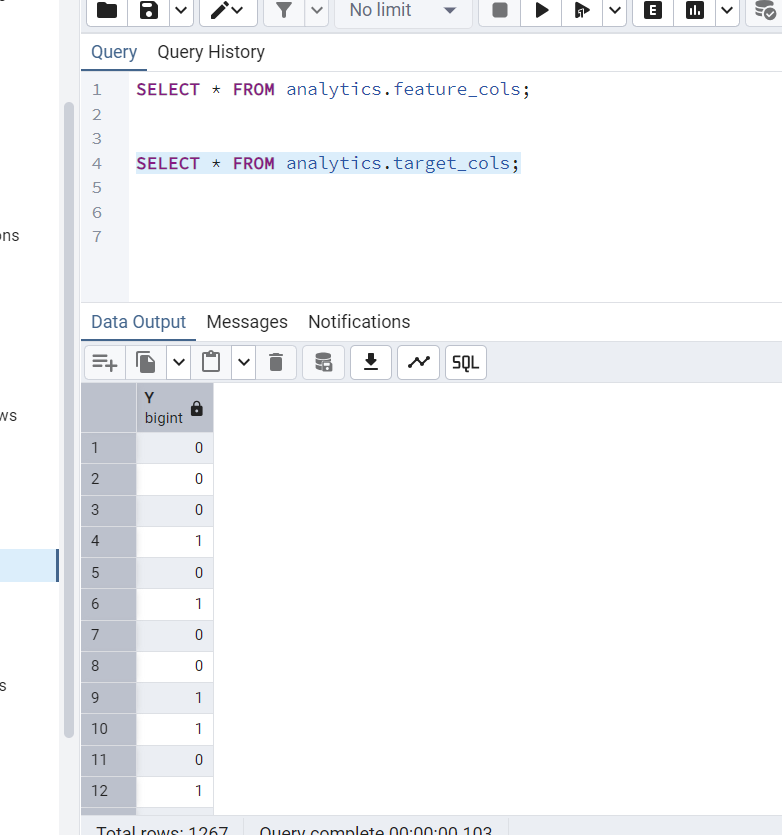